# detection face feature and paste images
date : 30 sep 2021
author : bae hueng myoung(benjamin)


1) required module : 
                opencv-python
                cmake
                dlib
        
2) required algorithm :
                hog(histogram of gradient)
                

# read image

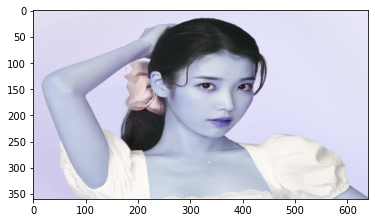

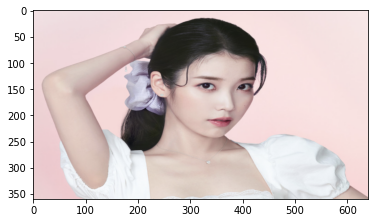

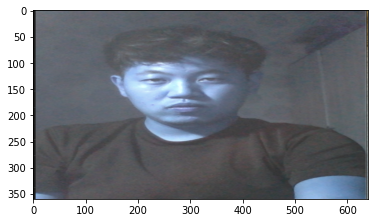

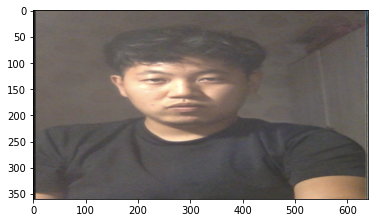

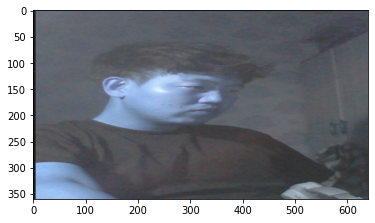

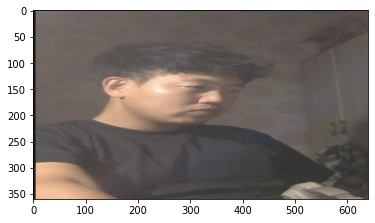

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

def ImgConvert(img_path,img_file):
    img_bgr = cv2.imread(img_path+img_file)    #- OpenCV로 이미지를 읽어서
    img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    plt.imshow(img_bgr)
    plt.show()

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()
    
    return img_rgb, img_show

img_path = os.getenv('HOME')+ '/aiffel/camera_sticker/images/'
img_file = ['image.png','benja.jpg', 'benjaangle.jpg']


img_rgb1,img_show1 = ImgConvert(img_path,img_file[0])
img_rgb2,img_show2 = ImgConvert(img_path,img_file[1])
img_rgb3,img_show3 = ImgConvert(img_path,img_file[2])

# face detection
using hog algorithm by dlib module

face location is : rectangles[[(287, 81) (442, 236)]]


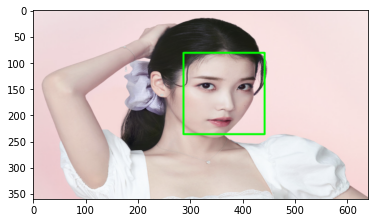

face location is : rectangles[]


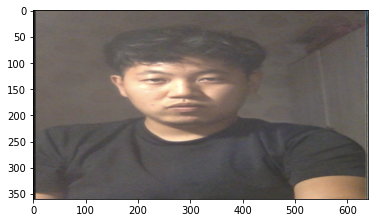

face location is : rectangles[]


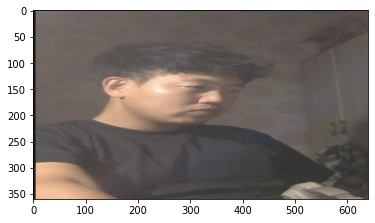

In [26]:
# definition of hog detector
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언

def FaceDetectionLocation(img_rgb,img_show):
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    print("face location is :",dlib_rects)   # 찾은 얼굴영역 좌표

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()
        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()


FaceDetectionLocation(img_rgb1,img_show1)
FaceDetectionLocation(img_rgb2,img_show2)
FaceDetectionLocation(img_rgb3,img_show3)

# face landmark

🌫🛸
68


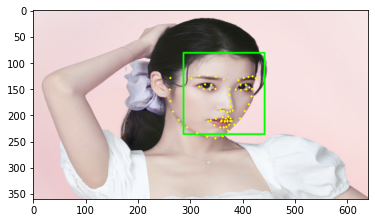

In [128]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# paste sticker


In [129]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # nose center index : 30
    x = landmark[33][0]   #코의 위치를 중심점으로 잡음(33번)
    y = landmark[33][1]   

    w = (landmark[33][0] - landmark[3][0])*2   #수염의 맨 좌측끝을 랜드마크3으로 가정하여 인중까지의 길이를 구하고 2배를 하면 스티커 전체 가로 길이 도출
    h = landmark[8][1] - landmark[13][1]       #수염의 맨위를 랜드마크 13번, 수염의 맨 아래를 랜드마크 8로 
#     w = dlib_rect.width()
#     h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
 

(371, 194)
(x,y) : (371,194)
(w,h) : (208,52)


In [130]:
   
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('left top (x,y) : (%d,%d)'%(refined_x, refined_y))



(52, 208, 3)
left top (x,y) : (267,168)


(52, 208, 3)
(52, 208, 3)


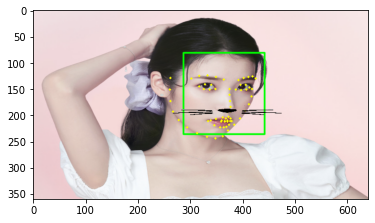

In [131]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)
print(img_sticker.shape)

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


In [141]:
ang_width = 7*img_sticker.shape[1]//10
ang_ref_x = refined_x + ang_width
ang_ref_y = refined_y

angle_sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], ang_ref_x:ang_ref_x + ang_width]



print(angle_sticker_area.shape)
print(refined_x)
print(ang_ref_x)

(52, 145, 3)
267
412


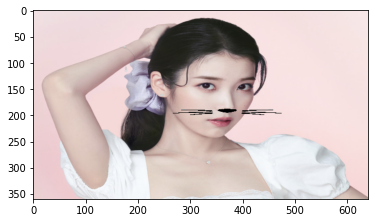

In [132]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)


plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# Report

overview:
    사람의 얼굴을 인지하는 것은 10개월이 지난 아기도 구분지을 수 있는 능력이다. 하지만 어떻게 다양한 표정과 밝기, 각도 등의 변화에도 눈, 코, 입의 요소들을 어떻게 인지할 수 있느냐의 당연한 물음에 대해서 자세한 설명은 매우 어려운 축에 속한다. 그리고 이를 명시적으로 프로그래밍하여 얼굴을 인지하는 것은 거의 불가능에 가까울지도 모른다. 하지만 엔지니어들은 사람 얼굴의 특징들을 추출하고 인지할 수 있는 알고리즘을 연구해왔고 hog(histogram of gradient)의 핵심적 알고리즘을 토대로 face detection과 face landmark의 함수를 만들어냈다. 나는 이번 프로젝트에서 해당 알고리즘으로 사람 얼굴을 얼마나 잘 인지할 수 있으며 조작할 수 있는지 실험해 볼 것이다.
    
"얼마나 사람 얼굴을 인지할 수 있을까"
    나는 첫번째 이미지로 국민 여동생, 국민 가수인 "아이유(이지은)" 사진을 선택하였다. 선택 이유는 연예인 사진은 인물 사진을 촬영하는 경험이 풍부한 전문 포토그래퍼가 찍었고 연예인 얼굴의 특징들을 잘 묘사할 수 있는 능력이 뛰어나다고 여겼기 때문이다. 그리고 위의 결과에서 아이유의 작은 얼굴을 인지할 수 있었고 각 얼굴의 특징들을 가리키는 랜드마크들을 잘 확인할 수 있었다. 하지만 일부의 영역은 밝고 일부의 영역은 어두운 일반 랩탑 캠으로 찍은 나의 사진에 대해서 해당 알고리즘은 전혀 사람 얼굴로 인식하지 못하는 한계성을 드러냈다. 또한 약 45도를 옆으로 돌린 나의 모습에 대해서도 얼굴을 인지하지 못하였다. 이러한 현상에 대해서 알고리즘의 성능에 대해 몇가지 지표를 고안해내었다. 
    첫째, 얼마나 밝기에 민감한가 : brightness_recognition_factor(:BRF)
    둘째, 얼마나 각도에 민감한가 : angle_recognition_factor(:ARF)
    
"어떻게 수염을 붙일 것인가"

    코를 중심으로 스티커를 붙이는데 성공하였다. 그러나 아이유의 수염은 무언가 부자연스럽다. 스티커는 정면을 바라보는 이미지이지만 아이유는 나를 바라보고 있지 않다. 아이유의 전체 얼굴의 시선 각도(not 눈의 시선)는 오른쪽 아래를 바라보고 있다. 따라서 자연스러운 수염의 각도는 x축을 기준으로 아랫방향으로, y축 기준으로 뒷방향으로 각도를 조정하여 수염이 끝으로 갈수록 아이유의 얼굴 볼과 밀착하도록 효과를 주어야 한다. 이를 수행하기 위해선 3d affine transformation의 지식을 필요로 하며 변한해야 한다. 그러나 나는 프로그래밍으로 구현하지 못하였다. 


limit :
첫째, 같은 각도에서 이미지를 서서히 명암을 높여가면서 인지율을 살펴보았어야 했다.
둘째, 같은 밝기에서 각도를 틀어가며 인지율을 살펴보았어야 했다.
셋째, 3d affine에 대해서 충분한 이해가 수반되어야 했다. 


        